<a href="https://colab.research.google.com/gist/sai2043/eec23451a51c68557b2a65a3b2fde6e3/simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
# Install Kaggle library
!pip install -q kaggle

In [3]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!echo '{"username":"saikr0","key":"c6c32e0ac7500277d37020084b58cc01"}' > kaggle.json

In [0]:
!cp /content/kaggle.json /root/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

 99% 1.06G/1.08G [00:11<00:00, 74.5MB/s]
100% 1.08G/1.08G [00:11<00:00, 103MB/s] 


In [8]:
!unzip the-simpsons-characters-dataset.zip -d Simpson/

Streaming output truncated to the last 5000 lines.
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: Simpson/simpsons_dataset/simpsons_

In [0]:
!rm -rf /content/Simpson/simpsons_dataset/simpsons_dataset/
!rm -rf Simpson/weights.best.hdf5  

In [0]:
!echo 'fastai2>=0.0.11' >> requirements.txt
!echo 'graphviz' >> requirements.txt
!echo 'ipywidgets' >> requirements.txt
!echo 'matplotlib' >> requirements.txt
!echo 'nbdev>=0.2.12' >> requirements.txt
!echo 'pandas' >> requirements.txt
!echo 'scikit_learn' >> requirements.txt
!echo 'azure-cognitiveservices-search-imagesearch' >> requirements.txt
!echo 'sentencepiece' >> requirements.txt
!echo 'utils' >> requirements.txt

In [11]:
!pip install -q -r requirements.txt
#!pip install -q utils

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 1.1MB 8.4MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
     |████████████████████████████████| 40kB 4.5MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 2.7MB 16.8MB/s 


In [0]:
from fastai2.vision.all import *
from utils import *
import matplotlib.pyplot as plt

In [0]:
img_dir = '/content/Simpson/simpsons_dataset'

In [0]:
# def get_files(path:PathOrStr, extensions:Collection[str]=None, recurse:bool=False, exclude:Optional[Collection[str]]=None,
#               include:Optional[Collection[str]]=None, presort:bool=False, followlinks:bool=False)->FilePathList:
#     "Return list of files in `path` that have a suffix in `extensions`; optionally `recurse`."
#     if recurse:
#         res = []
#         for i,(p,d,f) in enumerate(os.walk(path, followlinks=followlinks)):
#             # skip hidden dirs
#             if include is not None and i==0:   d[:] = [o for o in d if o in include]
#             elif exclude is not None and i==0: d[:] = [o for o in d if o not in exclude]
#             else:                              d[:] = [o for o in d if not o.startswith('.')]
#             res += _get_files(path, p, f, extensions)
#         if presort: res = sorted(res, key=lambda p: _path_to_same_str(p), reverse=False)
#         return res
#     else:
#         f = [o.name for o in os.scandir(path) if o.is_file()]
#         res = _get_files(path, path, f, extensions)
#         if presort: res = sorted(res, key=lambda p: _path_to_same_str(p), reverse=False)
#         return res

# def get_image_files(c:PathOrStr, check_ext:bool=True, recurse=True)->FilePathList:
#     "Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`."
#     return get_files(c, extensions=(image_extensions if check_ext else None), recurse=recurse)


In [0]:
def _get_files(parent, p, f, extensions):
    p = Path(p)#.relative_to(parent)
    if isinstance(extensions,str): extensions = [extensions]
    low_extensions = [e.lower() for e in extensions] if extensions is not None else None
    res = [p/o for o in f if not o.startswith('.')
           and (extensions is None or f'.{o.split(".")[-1].lower()}' in low_extensions)]
    return res

In [0]:
# path=Path(img_dir)
# data = ImageDataBunch.from_folder(path, train=".", 
#                                   valid_pct=0.2,
#                                   ds_tfms=get_transforms(do_flip=False,flip_vert=False, max_rotate=0,max_lighting=0.3),
#                                   size=224,bs=128, 
#                                   num_workers=0).normalize(imagenet_stats)
# print(f'Classes: \n {data.classes}')
# data.show_batch(rows=8, figsize=(40,40))

In [0]:
img_dir = '/content/Simpson/simpsons_dataset'
path=Path(img_dir)
img = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    #get_items=get_image_files,#using_attr(get_image_files(recurse=True)),
    get_items=partial(get_image_files,recurse=true),
    #splitter=RandomSubsetSplitter(0.2, 0.1),#RandomSplitter(valid_pct=0.2, seed=42),
    splitter=RandomSplitter(seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
#img.summary(path)

In [0]:
img = img.dataloaders(path)

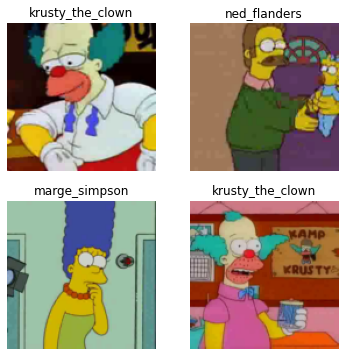

In [52]:
img.valid.show_batch(max_n=4, nrows=2)

In [53]:
len(img.train_ds.items)

16740

In [65]:
import warnings
warnings.filterwarnings('ignore')
learn = cnn_learner(img, resnet34, metrics=accuracy, opt_func=Adam, model_dir="/tmp/model/")
learn.fine_tune(4)
#learn.summary

epoch,train_loss,valid_loss,accuracy,time
0,1.853404,1.088254,0.716368,01:46


epoch,train_loss,valid_loss,accuracy,time
0,0.684449,0.410570,0.891756,01:51
1,0.372632,0.276991,0.929271,01:52
2,0.174470,0.213593,0.948148,01:52
3,0.082913,0.205869,0.953166,01:51


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fb511cc72e8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fb50d058278>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/l

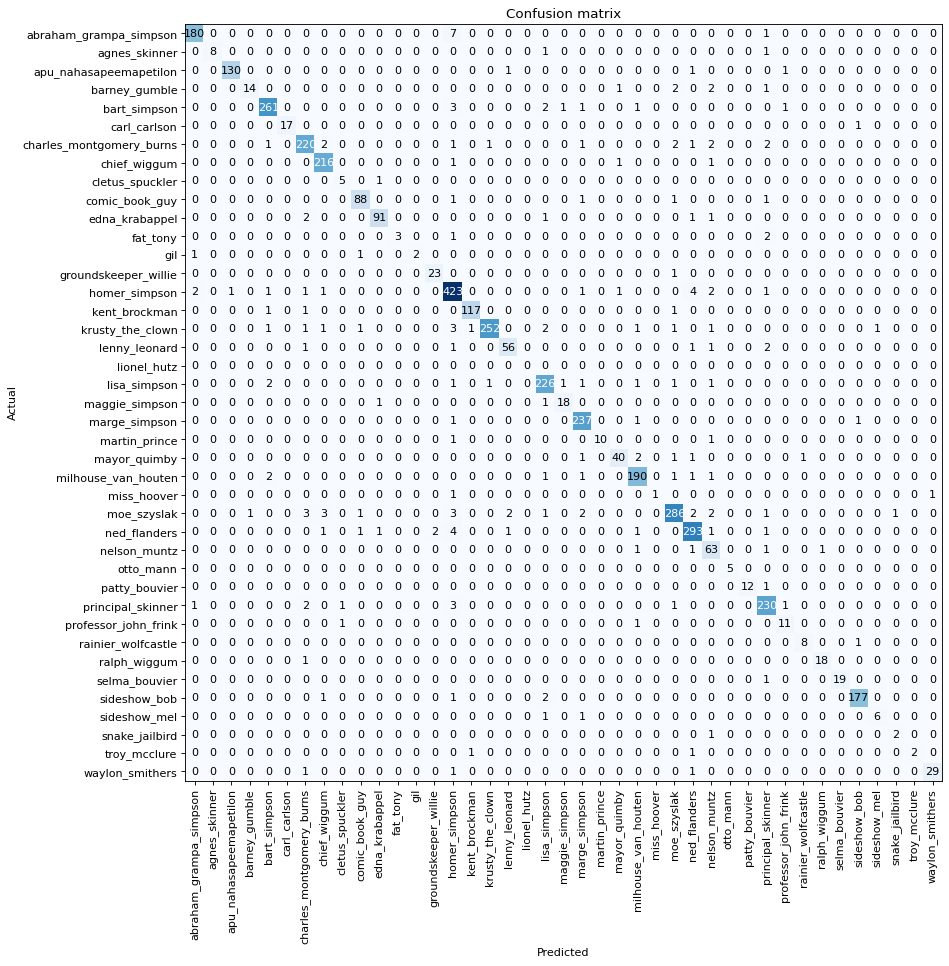

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=80)

SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=7.585775847473997e-07)

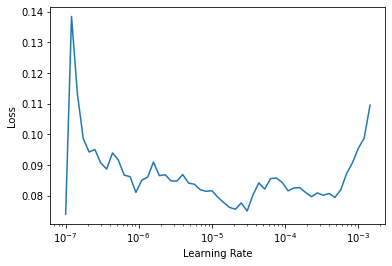

In [67]:
learn.unfreeze()
learn.lr_find()

In [68]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.075995,0.200352,0.953644,01:53
1,0.061885,0.193026,0.957467,01:52
2,0.055746,0.192623,0.956750,01:52
3,0.050458,0.193583,0.957228,01:53
4,0.038261,0.187343,0.955317,01:52
5,0.034973,0.189311,0.955795,01:52


In [70]:
from fastai2.callback.fp16 import *
learn = cnn_learner(img, resnet50, metrics=accuracy).to_fp16()
learn.fine_tune(10, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.005684,1.226259,0.682676,02:06
1,1.145650,0.797979,0.786380,02:06
2,0.791319,0.549501,0.852569,02:06


epoch,train_loss,valid_loss,accuracy,time
0,0.403259,0.301159,0.917324,02:35
1,0.272940,0.248592,0.936918,02:36
2,0.224928,0.242118,0.942891,02:36
3,0.152197,0.193186,0.953883,02:34
4,0.104992,0.193355,0.958423,02:34
5,0.067284,0.185236,0.957228,02:35
6,0.046033,0.160914,0.968220,02:34
7,0.021831,0.151052,0.970131,02:36
8,0.012173,0.141190,0.972521,02:35
9,0.010464,0.140291,0.972760,02:36


In [73]:
!kaggle competitions submit -c the-simpsons-characters-dataset -f /content/simpson.ipynb -m "Message"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 544, in competition_submit_cli
    competition, quiet)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 495, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python2.7/genericpath.py", line 57, in getsize
    return os.stat(filename).st_size
OSError: [Errno 2] No such file or directory: '/content/simpson.ipynb'


In [72]:
!pwd

/content
